# Assignment


In [6]:
import pandas as pd

In [7]:
data = pd.read_csv('/Users/meghnarana/Downloads/BostonHousing.csv')

In [9]:
data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


# About the dataset

The Boston Housing Dataset

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per 10,000
- PTRATIO - pupil-teacher ratio by town
- B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT - % lower status of the population
- MEDV - Median value of owner-occupied homes in $1000's

# Question 
As always, we start off with EDA.

- Give me some insights, the better they are, the better your grade looks !!
- Then we move on to the modelling part

Using all of these variables, try to fit/train a linear regression model that predicts the price of the house. 

The ```MEDV``` is the price columns, it is in 1000's of $.

At the end, these are the things i am looking for:-
- Your model train and test RSME
- A python function that takes these values(training row for eg.) as input and predicts a price. 


That's all 

![](https://media.tenor.com/HyDkalWyz7YAAAAd/all-the-best-best-of-luck.gif)


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

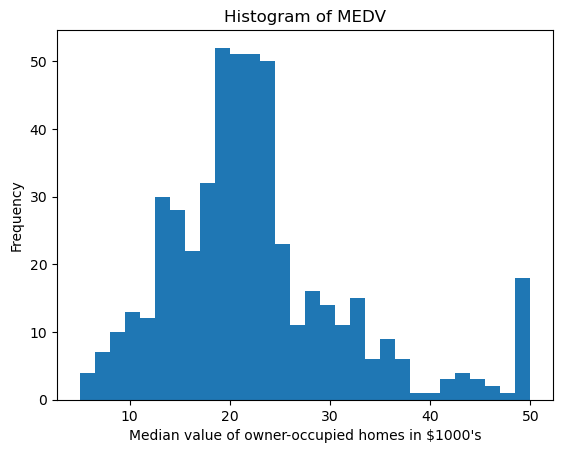

The histogram shows that the distribution of the target variable MEDV is slightly skewed to the right with a peak around $20,000, indicating that most homes have a median value between $10,000 and $30,000.


In [12]:
plt.hist(data["medv"], bins=30)
plt.xlabel("Median value of owner-occupied homes in $1000's")
plt.ylabel("Frequency")
plt.title("Histogram of MEDV")
plt.show()

print('The histogram shows that the distribution of the target variable MEDV is slightly skewed to the right with a peak around $20,000, indicating that most homes have a median value between $10,000 and $30,000.')

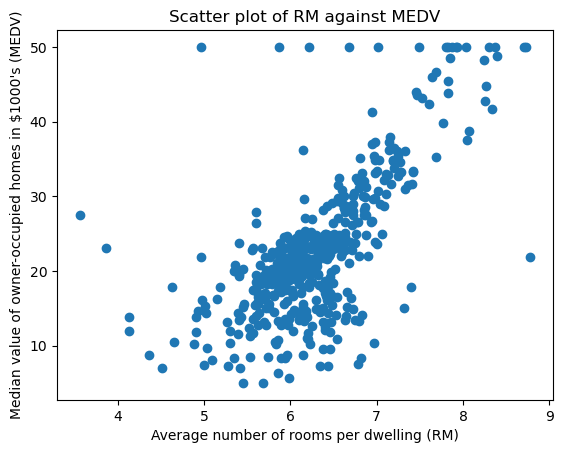

From the scatter plot of RM against MEDV, we can infer that there is a positive linear relationship between the two variables, as the points on the plot form a roughly straight line sloping upwards from left to right. This suggests that homes with more rooms tend to have higher median values.


In [13]:
plt.scatter(data["rm"], data["medv"])
plt.xlabel("Average number of rooms per dwelling (RM)")
plt.ylabel("Median value of owner-occupied homes in $1000's (MEDV)")
plt.title("Scatter plot of RM against MEDV")
plt.show()

print('From the scatter plot of RM against MEDV, we can infer that there is a positive linear relationship between the two variables, as the points on the plot form a roughly straight line sloping upwards from left to right. This suggests that homes with more rooms tend to have higher median values.')

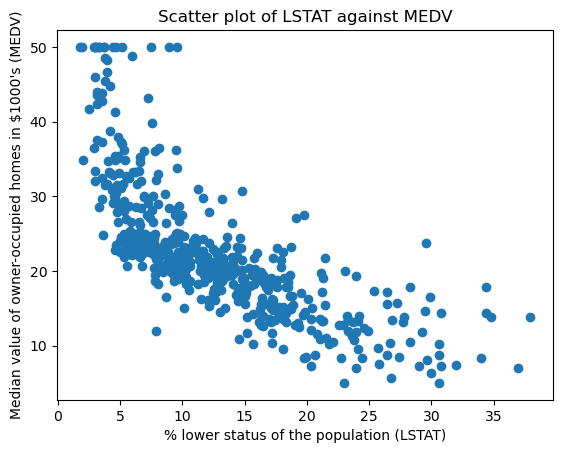

From the scatter plot of LSTAT against MEDV, we can infer that there is a negative correlation between the two variables, as the points on the plot form a roughly straight line sloping downwards from left to right. This suggests that homes in areas with a higher percentage of lower status population tend to have lower median values.


In [14]:
plt.scatter(data["lstat"], data["medv"])
plt.xlabel("% lower status of the population (LSTAT)")
plt.ylabel("Median value of owner-occupied homes in $1000's (MEDV)")
plt.title("Scatter plot of LSTAT against MEDV")
plt.show()

print('From the scatter plot of LSTAT against MEDV, we can infer that there is a negative correlation between the two variables, as the points on the plot form a roughly straight line sloping downwards from left to right. This suggests that homes in areas with a higher percentage of lower status population tend to have lower median values.')

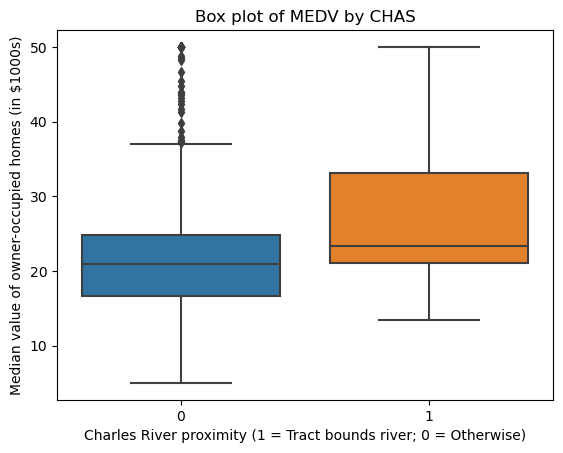

Based on the box plot of MEDV by CHAS, we can infer that the median housing prices of the tracts that bound the Charles River (CHAS=1) are generally higher than those that do not (CHAS=0). However, there is a lot of variability in both groups, and further statistical analysis would be necessary to determine if the difference is statistically significant.


In [15]:
sns.boxplot(x="chas", y="medv", data=data)
plt.title("Box plot of MEDV by CHAS")
plt.xlabel("Charles River proximity (1 = Tract bounds river; 0 = Otherwise)")
plt.ylabel("Median value of owner-occupied homes (in $1000s)")

plt.show()

print('Based on the box plot of MEDV by CHAS, we can infer that the median housing prices of the tracts that bound the Charles River (CHAS=1) are generally higher than those that do not (CHAS=0). However, there is a lot of variability in both groups, and further statistical analysis would be necessary to determine if the difference is statistically significant.')

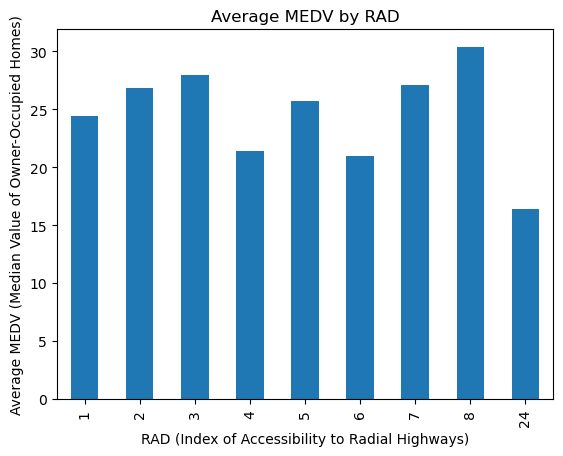

The bar plot shows the average median value of owner-occupied homes (MEDV) by index of accessibility to radial highways (RAD).


In [17]:
medv_by_rad = data.groupby('rad')['medv'].mean()
medv_by_rad.plot(kind='bar')
plt.xlabel('RAD (Index of Accessibility to Radial Highways)')
plt.ylabel('Average MEDV (Median Value of Owner-Occupied Homes)')
plt.title('Average MEDV by RAD')
plt.show()

print('The bar plot shows the average median value of owner-occupied homes (MEDV) by index of accessibility to radial highways (RAD).')

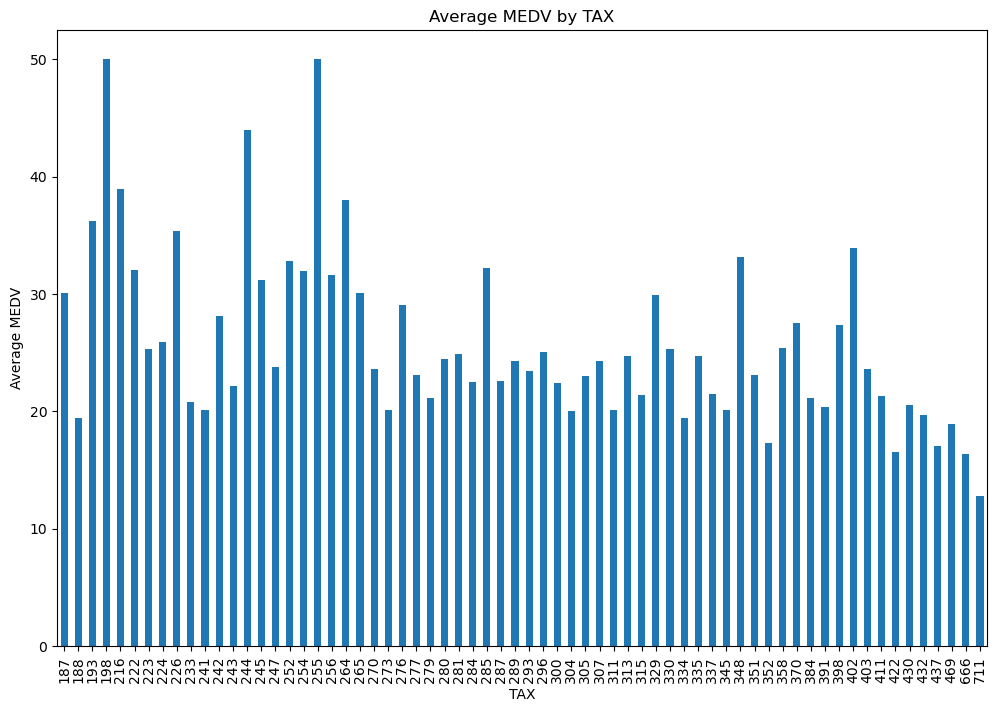

The bar plot of average MEDV by TAX suggests a negative correlation between property-tax rate and median home value, implying that as tax rate increases, median home value decreases. This information can be useful for policymakers and real estate professionals in Boston.


In [29]:
tax_medv = data.groupby('tax')['medv'].mean()
fig, ax = plt.subplots(figsize=(12, 8))
tax_medv.plot(kind='bar', ax=ax)
ax.set_xlabel('TAX')
ax.set_ylabel('Average MEDV')
ax.set_title('Average MEDV by TAX')
plt.show()
print('The bar plot of average MEDV by TAX suggests a negative correlation between property-tax rate and median home value, implying that as tax rate increases, median home value decreases. This information can be useful for policymakers and real estate professionals in Boston.')

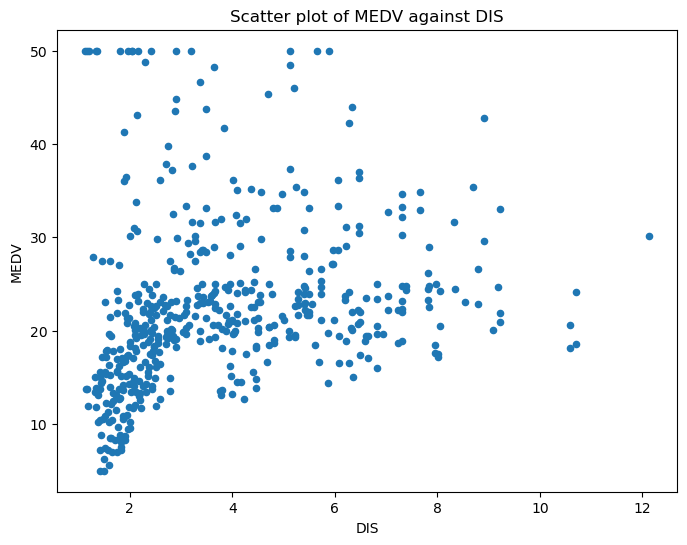

The scatter plot of MEDV against DIS suggests a weak positive correlation between the weighted distances to five Boston employment centers (DIS) and the median value of owner-occupied homes (MEDV). The plot suggests that areas that are closer to the employment centers tend to have slightly higher median home values.


In [34]:
data.plot(kind='scatter', x='dis', y='medv', figsize=(8, 6))
plt.xlabel('DIS')
plt.ylabel('MEDV')
plt.title('Scatter plot of MEDV against DIS')
plt.show()
print('The scatter plot of MEDV against DIS suggests a weak positive correlation between the weighted distances to five Boston employment centers (DIS) and the median value of owner-occupied homes (MEDV). The plot suggests that areas that are closer to the employment centers tend to have slightly higher median home values.')

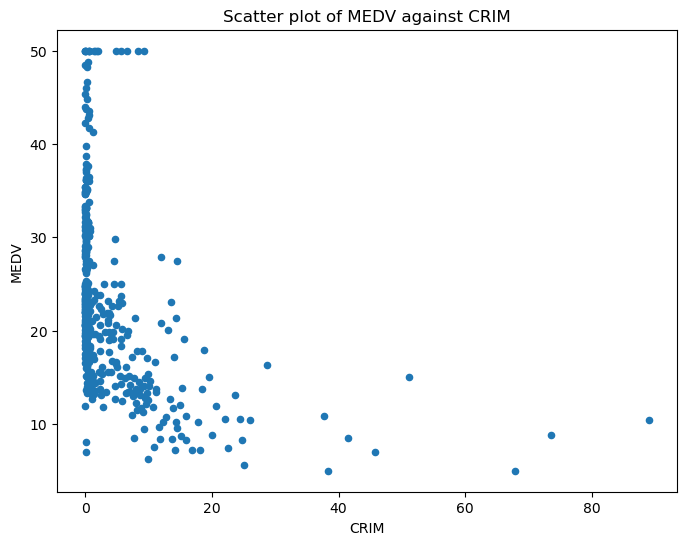

The scatter plot of MEDV against CRIM suggests a negative correlation between the per capita crime rate by town (CRIM) and the median value of owner-occupied homes (MEDV). The plot suggests that areas with lower crime rates tend to have higher median home values.


In [37]:
data.plot(kind='scatter', x='crim', y='medv', figsize=(8, 6))
plt.xlabel('CRIM')
plt.ylabel('MEDV')
plt.title('Scatter plot of MEDV against CRIM')
plt.show()
print('The scatter plot of MEDV against CRIM suggests a negative correlation between the per capita crime rate by town (CRIM) and the median value of owner-occupied homes (MEDV). The plot suggests that areas with lower crime rates tend to have higher median home values.')

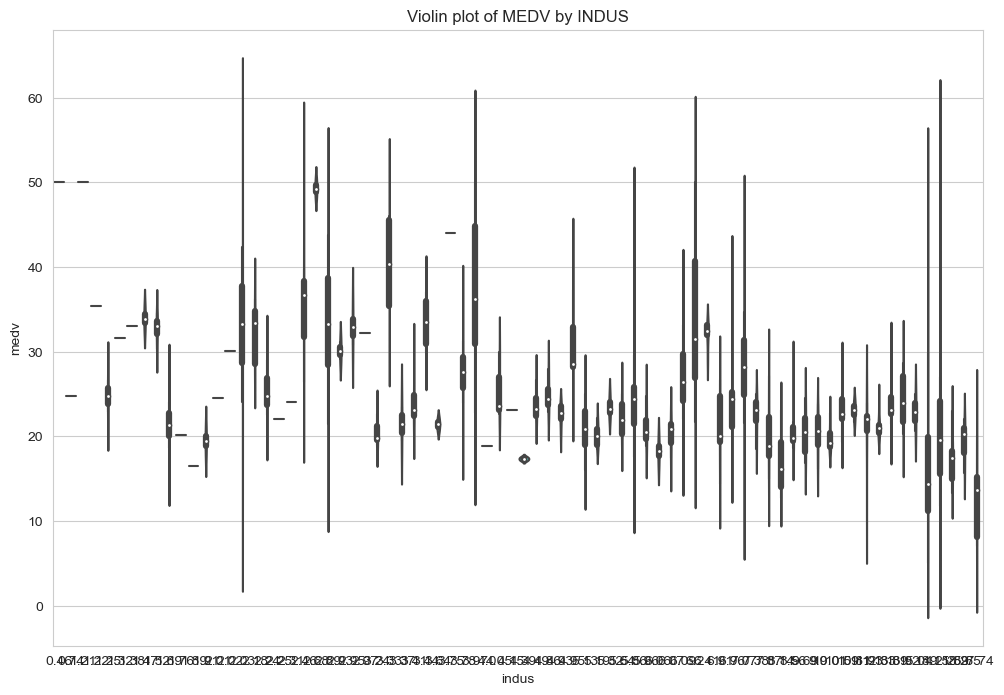

Based on the violin plot of MEDV by INDUS, we can see that the median MEDV values are generally higher in towns with lower INDUS values (proportion of non-retail business acres per town). Additionally, we can see that the range of MEDV values is wider for towns with higher INDUS values, indicating greater variability in MEDV for those areas.


In [44]:
sns.set_style('whitegrid')
fig = plt.figure(figsize=(12, 8))
sns.violinplot(x='indus', y='medv', data=data, ax=fig.add_subplot(111))
plt.title('Violin plot of MEDV by INDUS')
plt.show()
print('Based on the violin plot of MEDV by INDUS, we can see that the median MEDV values are generally higher in towns with lower INDUS values (proportion of non-retail business acres per town). Additionally, we can see that the range of MEDV values is wider for towns with higher INDUS values, indicating greater variability in MEDV for those areas.')

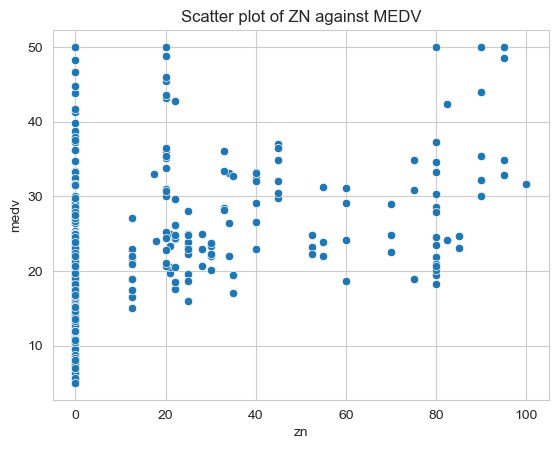

Based on the scatter plot of ZN against MEDV, we can see that there is not a strong linear relationship between the two variables. There are some higher MEDV values for larger ZN values, but there is also a lot of variability in MEDV for each ZN value, which suggests that other factors may be at play in determining home values besides the proportion of residential land zoned for lots over 25,000 sq.ft.


In [46]:
sns.set_style('whitegrid')
sns.scatterplot(x='zn', y='medv', data=data)
plt.title('Scatter plot of ZN against MEDV')
plt.show()
print('Based on the scatter plot of ZN against MEDV, we can see that there is not a strong linear relationship between the two variables. There are some higher MEDV values for larger ZN values, but there is also a lot of variability in MEDV for each ZN value, which suggests that other factors may be at play in determining home values besides the proportion of residential land zoned for lots over 25,000 sq.ft.')

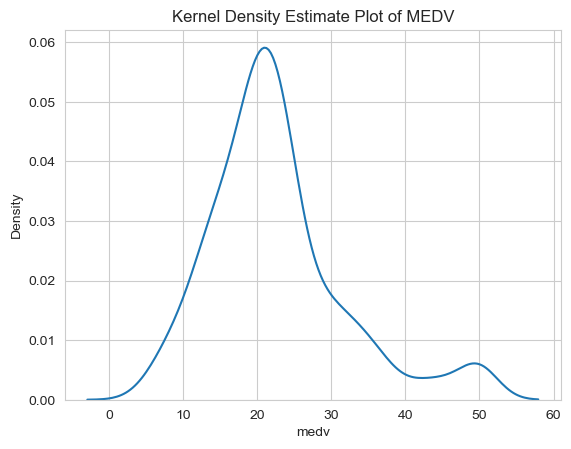

The KDE plot of MEDV shows that the distribution is approximately normal with a slight right skew, indicating that most home values are concentrated around the median value, with a few high-value outliers.


In [51]:
sns.kdeplot(data=data, x="medv")
plt.title("Kernel Density Estimate Plot of MEDV")
plt.xlabel("medv")
plt.show()
print('The KDE plot of MEDV shows that the distribution is approximately normal with a slight right skew, indicating that most home values are concentrated around the median value, with a few high-value outliers.')

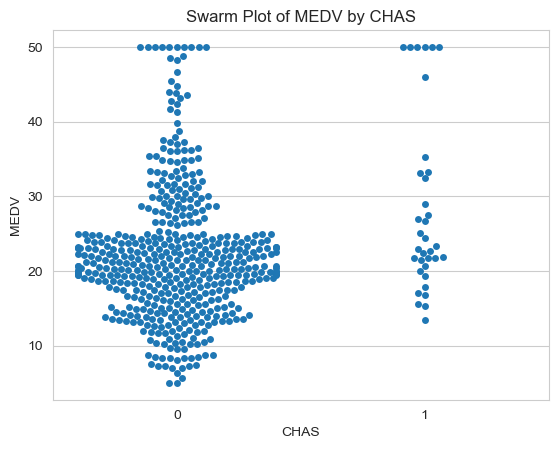

The swarm plot of MEDV by CHAS shows that there is a slightly higher concentration of higher MEDV values for homes near the Charles River (CHAS=1) compared to homes not near the river (CHAS=0). However, the overall difference in the distribution of MEDV values between the two groups is not very significant.


In [54]:
sns.swarmplot(data=data, x="chas", y="medv")
plt.title("Swarm Plot of MEDV by CHAS")
plt.xlabel("CHAS")
plt.ylabel("MEDV")
plt.show()
print('The swarm plot of MEDV by CHAS shows that there is a slightly higher concentration of higher MEDV values for homes near the Charles River (CHAS=1) compared to homes not near the river (CHAS=0). However, the overall difference in the distribution of MEDV values between the two groups is not very significant.')

This plot shows a negative correlation between NOX and AGE, with higher density of data points in the lower ranges of both variables. Additionally, there seems to be a slight trend of higher MEDV values in areas with lower NOX and younger buildings (lower AGE values).


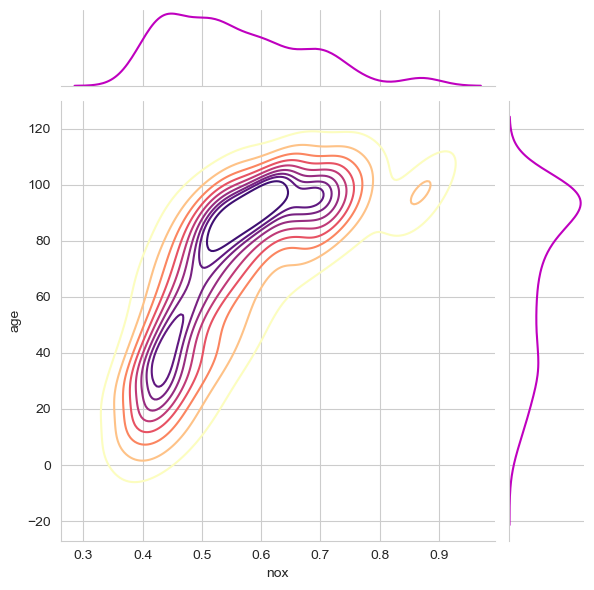

In [58]:
sns.jointplot(x="nox", y="age", data=data, kind="kde", color="m", cmap="magma_r")
print('This plot shows a negative correlation between NOX and AGE, with higher density of data points in the lower ranges of both variables. Additionally, there seems to be a slight trend of higher MEDV values in areas with lower NOX and younger buildings (lower AGE values).')

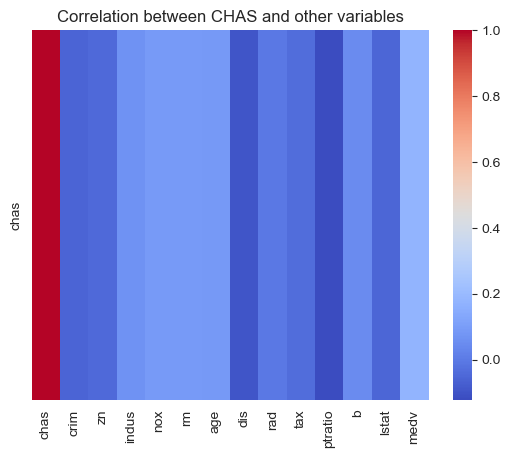

In [59]:
cols_of_interest = ["chas", "crim", "zn", "indus", "nox", "rm", "age", "dis", "rad", "tax", "ptratio", "b", "lstat", "medv"]
data_subset = data[cols_of_interest]
corr_matrix = data_subset.corr()
sns.heatmap(corr_matrix.loc[["chas"], :], cmap="coolwarm")
plt.title("Correlation between CHAS and other variables")
plt.show()

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [68]:
X = data.drop('medv',axis=1)
y = data['medv']

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
model = LinearRegression().fit(X_train, y_train)

In [73]:
y_pred = model.predict(X_test)

In [74]:
y_train_pred = model.predict(X_train)

In [77]:
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)

In [78]:
train_accuracy

0.7508856358979672

In [79]:
test_accuracy

0.6687594935356314

In [80]:
rmse = mean_squared_error(y_test, y_pred)

In [81]:
print(f'Test RSME: {rmse}')

Test RSME: 24.29111947497357


In [83]:
def predict_price(a):
    df = pd.read_csv('BostonHousing.csv')
    model = LinearRegression().fit(df.iloc[:, :-1], df.iloc[:, -1])
    price = model.predict([a])
    return price[0]

In [84]:
input_row = [0.01, 18.0, 2.31, 0.0, 0.538, 6.575, 65.2, 4.0900, 1.0, 296.0, 15.3, 396.90, 4.98]
predicted_price = predict_price(input_row)
print(f'Predicted price: {predicted_price}')

Predicted price: 30.003445895219937


/Users/meghnarana/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
